# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


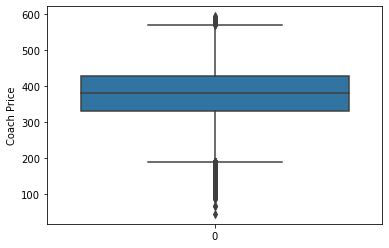

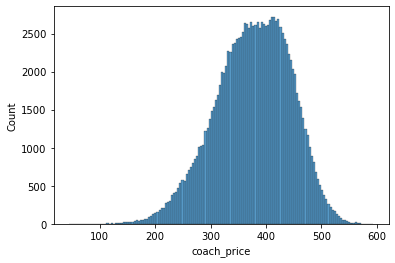

mean: 376.5852530821279
median: 380.56
min: 44.415
max: 593.635


<Figure size 432x288 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

## Task 1
#Show boxplot
sns.boxplot(data=flight['coach_price'])
plt.ylabel('Coach Price')
plt.show()
plt.clf()
#Show histogram
sns.histplot(flight['coach_price'])
plt.show()
plt.clf()

#Visually we can get a good idea of what the average, min and max coach ticket prices are from the box plot and histogram.
#Let's verify by calculating mean, median, min and max.
print('mean: ' + str(flight['coach_price'].mean()))
print('median: ' + str(flight['coach_price'].median()))
print('min: ' + str(flight['coach_price'].min()))
print('max: ' + str(flight['coach_price'].max()))

#$500 coach ticket would be significantly above the average of approx. $380 so it would not be considered a 'good' price.
#Visually we can see that $500 would be on the upper end of previous ticket prices.
#However, the below plots and calculations do not discriminate based on any other factors, particularly travel time.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


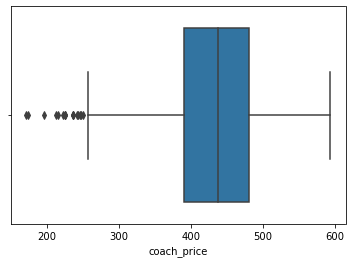

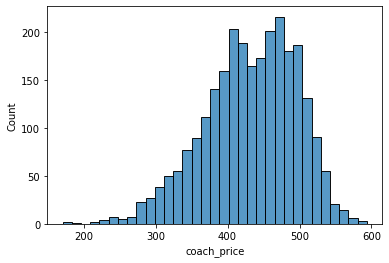

mean: 431.8343773728164
median: 437.115
min: 170.77
max: 593.635


<Figure size 432x288 with 0 Axes>

In [3]:
## Task 2
#Show boxplot to compare ticket prices across different travel times.
eight_hour_prices = flight.coach_price[flight.hours == 8]
sns.boxplot(eight_hour_prices)
plt.show()
plt.clf()

#Show histogram
sns.histplot(eight_hour_prices)
plt.show()
plt.clf()

#Mean, median, min, max
print('mean: ' + str(eight_hour_prices.mean()))
print('median: ' + str(eight_hour_prices.median()))
print('min: ' + str(eight_hour_prices.min()))
print('max: ' + str(eight_hour_prices.max()))

#A $500 for an eight hour trip is more reasonable than before, but it is still above the 75th percentile (per box plot).
#Therefore, would still classify as an expensive ticket

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

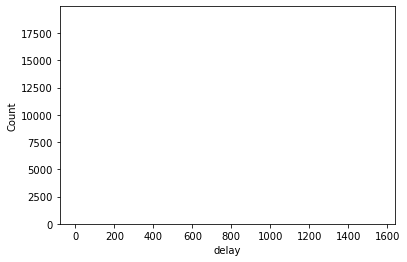

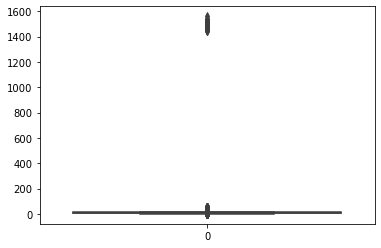

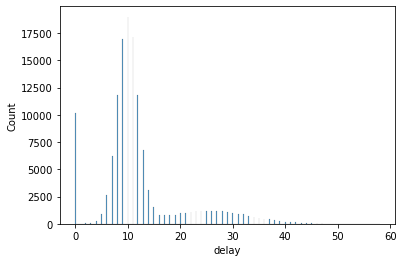

<Figure size 432x288 with 0 Axes>

In [4]:
## Task 3
#Plot delay time counts using histogram.
sns.histplot(data=flight['delay'])
plt.show()
plt.clf()

#Can see there must be significant outliers which are skewing the histogram formatting
#Check with a boxplot
sns.boxplot(data=flight['delay'])
plt.show()
plt.clf()

#Reduce plot range to below 200
sns.histplot(data=flight['delay'][flight['delay']<200])
plt.show()
plt.clf()

#Can see the count is heavily concentrated on delay times between 5 and 15 minutes.

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

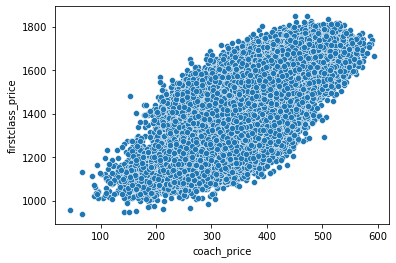

<Figure size 432x288 with 0 Axes>

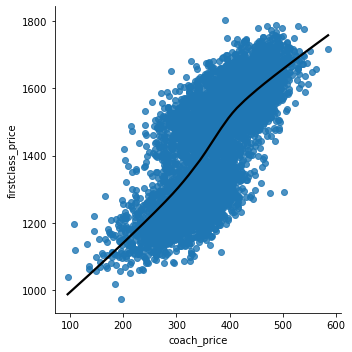

<Figure size 432x288 with 0 Axes>

In [22]:
## Task 4
#Try scatter plot for first-class vs coach price
sns.scatterplot(x='coach_price', y = 'firstclass_price', data = flight)
plt.show()
plt.clf()
#Can see a positive linear relationship already, but will test skills by taking a subset of this data to make the plot less crowded.
#Will also test out a LOWESS
perc = 0.05
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
sns.lmplot(x='coach_price', y='firstclass_price', data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()
#Both plots demonstrate a positive linear relationship between coach and first class ticket prices

    #Note: line_kws takes a dictionary key:value pair. In this case, it specifies the colour
    #lowess takes a bool value. If true, then it creates a lowess model (i.e. the smooth line over data points)


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

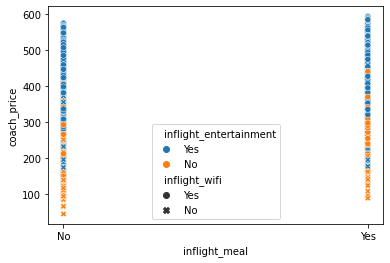

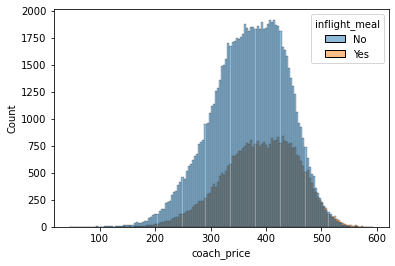

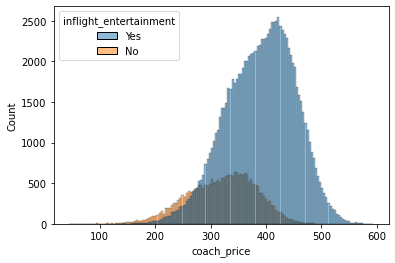

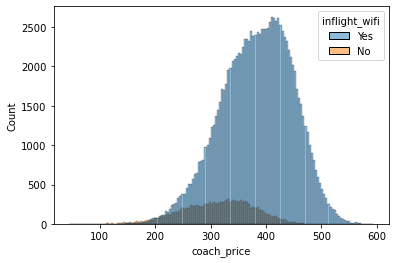

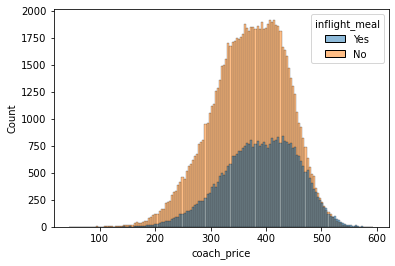

<Figure size 432x288 with 0 Axes>

In [10]:
## Task 5
#Will test plotting all three inflight features at once on a scatter plot, although will likely be too messy.
sns.scatterplot(x = 'inflight_meal', y = 'coach_price', hue = 'inflight_entertainment', style = 'inflight_wifi', data = flight)
plt.show()
plt.clf()
#As predicted, too messy to get a clear picture of the relationship between the features and price.
#Although can roughly see that blue circles (yes to entertainment and wifi) tend to be the highest price.
#Will plot separate histograms to compare each feature separately.
# Inflight Meals
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()

# Inflight Entertainment
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

# Inflight WiFi
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()

#Since "no" has the larger count in inflight_meal, it defaults to the blue bars.
#This could be confusing, since it is the opposite for the other two graphs.
#Will test skills by specifying the colors for "yes" and "no" to match formatting for other graphs
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal, hue_order=['Yes', 'No'])
plt.show()
plt.clf()
#Note: hue_order takes a list ("vector") of strings to specify the order of the categorical variables used on the color palette.
#Here, we specified that "Yes" should come first and be blue.

#Observations from the three graphs:
#Far more common to have inflight wifi and inflight entertainment than not.
#More common not to have a meal than to have one.
#The more expensive tickets are very likely to have inflight meals and entertainment
#There is not a strong relationship between price and having an inflight meal.
    # The "yes" distribution is skewed more right which indicates cheaper tickets are more likely not to have a meal than expensive tickets.


6. How does the number of passengers change in relation to the length of flights?

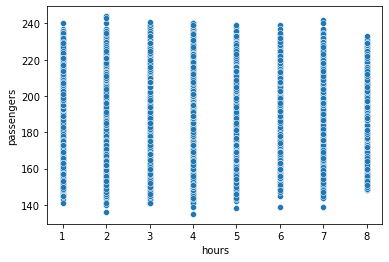

<Figure size 432x288 with 0 Axes>

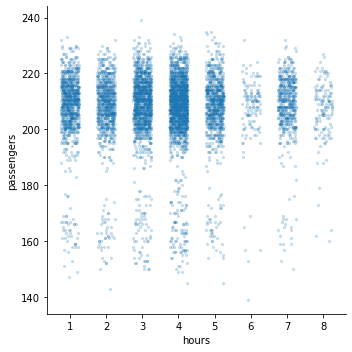

<Figure size 432x288 with 0 Axes>

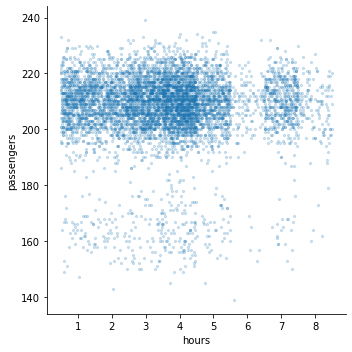

<Figure size 432x288 with 0 Axes>

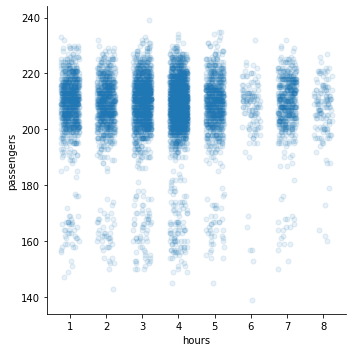

<Figure size 432x288 with 0 Axes>

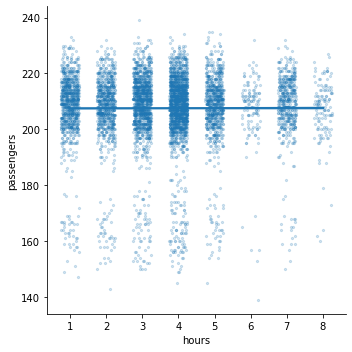

<Figure size 432x288 with 0 Axes>

In [20]:
## Task 6
#Test using scatter plot with length of flight as x axis
sns.scatterplot(data=flight, x = 'hours', y = 'passengers')
plt.show()
plt.clf()
#Can see very little correlation between the two variables, but it could be that the plot is too dense.
#Will test using sns.lmplot - using solution model as guidance.
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

#Notes on parameters used:
    #x_jitter is used to specify the "noise" either side of the vertical line upwards from the x=axis.
    #It is useful to demonstrate the density of datapoints in a large dataset with discrete variables.
    #For example, see below with an x_jitter of 0.5 (it is un-useable due to too much noise):
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.5, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()
   
    #scatter_kws is used to specify formatting for the plot points
    #It takes dictionary key:value pairs.
    #"s": (value) specifies how large the plotpoints will be
    #"alpha": (value) specifies the transparency of the plotpoints
    #e.g.
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 25, "alpha":0.1}, fit_reg = False)
plt.show()
plt.clf()

    #fit_reg takes a bool value. If true, plots a regression model
    #e.g.
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = True)
plt.show()
plt.clf()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

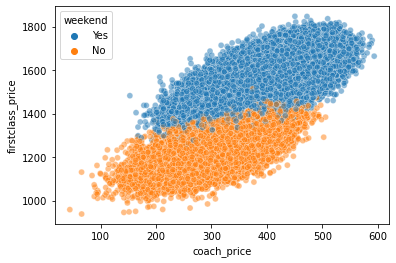

<Figure size 432x288 with 0 Axes>

In [33]:
## Task 7
sns.scatterplot(data=flight, x='coach_price', y='firstclass_price', hue=flight.weekend, alpha = 0.5)
plt.show()
plt.clf()
#Adjust transparency to see dots through overlap.
#Very clear trend that first class tickets become more expensive on weekends (in comparison to the increase in coach tickets)

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

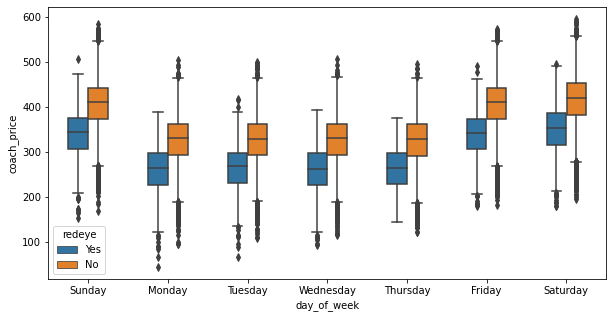

<Figure size 432x288 with 0 Axes>

In [43]:
## Task 8
#Played around with scatter plot / lmplot but not appropriate for this analysis
#Using side-by-side box and whisker plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=flight, x='day_of_week', y='coach_price', hue='redeye', width=0.5, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()
plt.clf()

#Redeye prices are consistently cheaper on each day of the week
#There is a fairly even bump in price for Fri, Sat, Sun compared with the other four days
